In [11]:
# import required packages
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [12]:
# Load the IMD dataset
imd_data = pd.read_csv('English_imd_2019_london.csv')

# Load the Education dataset
Qulifications_data = pd.read_csv('qulifications_London.csv')

# Load the London dataset
london_shp = gpd.read_file('LSOA_2011_London_gen_MHW.shp')

In [13]:
# Exploratory Data Description
print(imd_data.head())
print(imd_data.info())
print(Qulifications_data.head())
print(Qulifications_data.info())
print(london_shp.head())
print(london_shp.info())

#Check for Missing Values
print(imd_data.isnull().sum())
print(Qulifications_data.isnull().sum())
print(london_shp.isnull().sum())

    lsoa11cd                  la11nm  england_imd_rank  england_imd_decile  \
0  E01002082                Haringey               546                   1   
1  E01002857  Kensington and Chelsea              1012                   1   
2  E01001178                 Croydon              1096                   1   
3  E01000601                   Brent              1192                   1   
4  E01002853  Kensington and Chelsea              1212                   1   

   london_imd_rank  london_imd_decile  
0                1                  1  
1                2                  1  
2                3                  1  
3                4                  1  
4                5                  1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lsoa11cd            4835 non-null   object
 1   la11nm              4835 non-null   

In [14]:
# Drop unnecessary columns
Qulifications_data = Qulifications_data.drop(columns =[
    'Qualifications: Schoolchildren and full-time students: Age 16 to 17; measures: Value',
    'Qualifications: Schoolchildren and full-time students: Age 18 and over; measures: Value',
    'Qualifications: Full-time students: Age 18 to 74: Economically active: In employment; measures: Value',
    'Qualifications: Full-time students: Age 18 to 74: Economically active: Unemployed; measures: Value',
    'Qualifications: Full-time students: Age 18 to 74: Economically inactive; measures: Value'])
Qulifications_data.columns

london_shp = london_shp.drop(columns =[
    'USUALRES',
    'HHOLDRES',
    'COMESTRES',
    'POPDEN',
    'HHOLDS',
    'AVHHOLDSZ',
])
london_shp.columns


# Rename columns for better readability
Qulifications_data = Qulifications_data.rename(columns={
    'Qualifications: All categories: Highest level of qualification; measures: Value': 'Total_Qualifications',
    'Qualifications: No qualifications; measures: Value': 'No_Qualifications',
    'Qualifications: Highest level of qualification: Level 1 qualifications; measures: Value': 'Level_1_Qualifications',
    'Qualifications: Highest level of qualification: Level 2 qualifications; measures: Value': 'Level_2_Qualifications',
    'Qualifications: Highest level of qualification: Apprenticeship; measures: Value': 'Apprenticeship',
    'Qualifications: Highest level of qualification: Level 3 qualifications; measures: Value': 'Level_3_Qualifications',
    'Qualifications: Highest level of qualification: Level 4 qualifications and above; measures: Value': 'Level_4_Qualifications',
    'Qualifications: Highest level of qualification: Other qualifications; measures: Value': 'Other_Qualifications'

})

In [15]:
# join data by column 'Isoa11cd'
merged_data = pd.merge(Qulifications_data, imd_data, on='lsoa11cd')
joined_data = imd_data.merge(london_shp, left_on='lsoa11cd', right_on='LSOA11CD')

# Check and deal with data
merged_data.dropna(inplace=True)
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   lsoa11cd            4835 non-null   object  
 1   la11nm              4835 non-null   object  
 2   england_imd_rank    4835 non-null   int64   
 3   england_imd_decile  4835 non-null   int64   
 4   london_imd_rank     4835 non-null   int64   
 5   london_imd_decile   4835 non-null   int64   
 6   LSOA11CD            4835 non-null   object  
 7   LSOA11NM            4835 non-null   object  
 8   MSOA11CD            4835 non-null   object  
 9   MSOA11NM            4835 non-null   object  
 10  LAD11CD             4835 non-null   object  
 11  LAD11NM             4835 non-null   object  
 12  RGN11CD             4835 non-null   object  
 13  RGN11NM             4835 non-null   object  
 14  geometry            4835 non-null   geometry
dtypes: geometry(1), int64(4), object(10)
m

In [16]:
# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(merged_data['london_imd_rank'], merged_data['Total_Qualifications'])

print(f"Spearman's rank correlation: {correlation}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant correlation between isolation rank and qualification level.")
else:
    print("There is no statistically significant correlation.")

Spearman's rank correlation: 0.011180619928839482, p-value: 0.43700636904314594
There is no statistically significant correlation.


<ipython-input-17-654408e17679>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


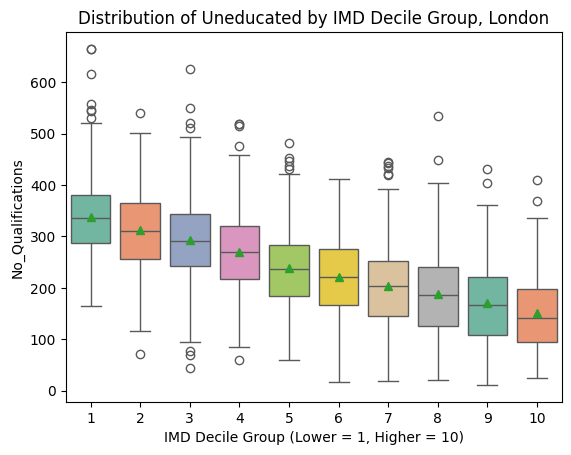

In [17]:
# Boxplot with colorblind-friendly palette
sns.boxplot(
   x="london_imd_decile",
   y="No_Qualifications",
   showmeans=True,
   palette="Set2",
   data=merged_data
)

# set labels and title
plt.xlabel("IMD Decile Group (Lower = 1, Higher = 10)")
plt.ylabel("No_Qualifications")
plt.title("Distribution of Uneducated by IMD Decile Group, London")
plt.show()

<ipython-input-20-1560d2b5e0e5>:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='IMD Decile (from Most to Least)')


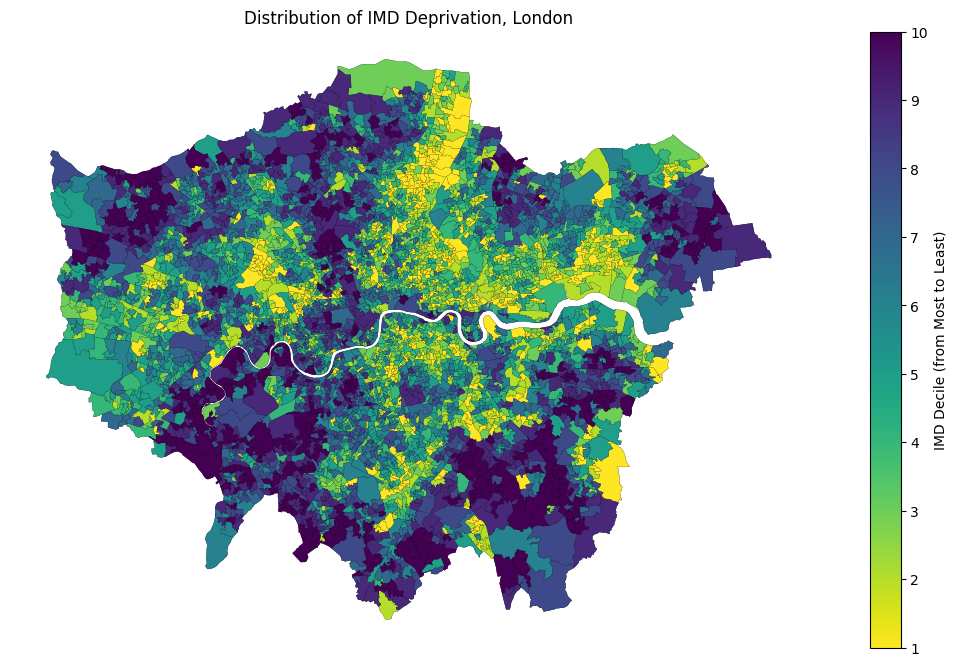

In [20]:
# Create a GeoDataFrame object from the merged data (joined_data)
# converting it to a geospatial dataframe
#and setting the 'geometry' column as the geometry column for spatial analysis
geodata = gpd.GeoDataFrame(joined_data, geometry=joined_data['geometry'])
london_imd_decile = geodata['london_imd_decile']

# Extract the 'london_imd_decile' column from the geodata DataFrame
# and store it in the variable london_imd_decile.
london_imd_decile = geodata['london_imd_decile']


# Create GeoDataFrame with explicit CRS
crs = {'init': 'epsg:27700'}
geodata = gpd.GeoDataFrame(joined_data, geometry=joined_data['geometry'], crs=crs)


# Create colormap suitable for colorblind audiences
fig, ax = plt.subplots(1, figsize=(16,8))
geodata.plot(ax=ax, column='london_imd_decile', cmap='viridis_r', edgecolor='black', linewidth=0.1)


# Create color normalization
norm = Normalize(vmin=min(geodata['london_imd_decile']), vmax=max(geodata['london_imd_decile']))

# Plot with colormap
geodata.plot(ax=ax, column='london_imd_decile', cmap='viridis_r', edgecolor='black', linewidth=0.1, norm=norm)

# Create colorbar as legend
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='IMD Decile (from Most to Least)')


# remove axis
ax.set_axis_off()

# set a suitable title
ax.set_title('Distribution of IMD Deprivation, London')

plt.show()